1. Варіант 1. Модифікувати середовище замерзлого озера за власним задумом (розглянути щонайменше 2 варіанти). https://www.gymlibrary.dev/environments/toy_text/frozen_lake/ </br>
`custom_map = [
    'SFFHF',
    'HFHFF',
    'HFFFH',
    'HHHFH',
    'HFFFG'
]`
`env = gym.make('FrozenLake-v0', desc=custom_map)`

2. Зробити агента, що обирає дії випадково 
3. Зробити агента, що обирає дії згідно q-learning 
4. Зробити агента, що обирає 
дії згідно SARSA алгоритму 
5. Для пунктів 3 та 4 дослідити різні значення параметру γ (мінімум 3)
6. Вивести на екран графік залежності значення винагороди та номеру епізоду. 
7. Зробити висновки по роботі.


In [1]:
# %pip install gym[toy_text]
import gym
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random

In [2]:
def show(render):
    plt.figure(figsize=(2,2))
    plt.imshow(render)
    plt.show()

In [3]:
def show_animation(render):
    clear_output(wait=True)
    plt.figure(figsize=(2,2))
    plt.imshow(render)
    plt.show()
    time.sleep(1)

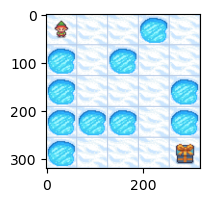

In [4]:
custom_map = ['SFFHF', 'HFHFF','HFFFH','HHHFH','HFFFG']
env = gym.make("FrozenLake-v1", desc=custom_map, render_mode='rgb_array',  is_slippery=False)
env.reset()
show(env.render())


##  Агент, що обирає дії випадково 

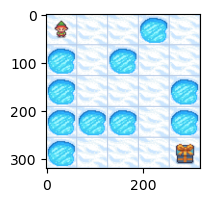

---------------------------
Step:  0
Action:  Down


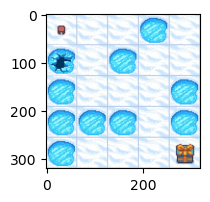

In [5]:
actions = {
    0: 'Left',
    1: 'Down',
    2: 'Right', 
    3: 'Up'
}
MAX_ITERATIONS = 20

custom_map = ['SFFHF', 'HFHFF','HFFFH','HHHFH','HFFFG']
env = gym.make("FrozenLake-v1", desc=custom_map, render_mode='rgb_array', is_slippery=False)
env.reset()
show(env.render())

for i in range(MAX_ITERATIONS):
    print('---------------------------')
    random_action = env.action_space.sample()
    new_state, reward, done, boo, info = env.step(random_action)
    print("Step: ", i)
    print("Action: ", actions[random_action])
    show(env.render())
    
    if done:
        break  

## Агент, що обирає дії згідно q-learning

In [6]:
def Qtable(env, episodes=1000, lr=0.7, gamma=0.95, epsilon=0.02, max_steps=300, print_table=False):    
    qtable = np.zeros((env.observation_space.n, env.action_space.n ))
    outcomes = []
    
    for episode in range(episodes):
        state = env.reset()[0]
        step = 0
        done = False
        outcomes.append("Failure")

        for step in range(max_steps):
            random_int = random.uniform(0,1)
            if random_int > epsilon and np.max(qtable[state]) > 0:
                action = np.argmax(qtable[state])
            else:
                action = env.action_space.sample()
            
            new_state, reward, done, _, info = env.step(action)
            
            qtable[state][action] = qtable[state][action] + lr * (reward + gamma * np.max(qtable[new_state]) - qtable[state][action])
            
            # If done, finish the episode
            if reward:
                outcomes[-1] = "Success"
                
            if done:
                break
            
            state = new_state
            
    if print_table:
        print('Q-table after training:')
        print(qtable)
            
    return qtable, outcomes

Q-table after training:
[[0.66342043 0.         0.6983373  0.66342043]
 [0.66342043 0.73509189 0.66342043 0.6983373 ]
 [0.6983373  0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.77378094 0.         0.6983373 ]
 [0.         0.         0.         0.        ]
 [0.         0.857375   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.81450625 0.73509189]
 [0.77378094 0.         0.857375   0.        ]
 [0.81450625 0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0

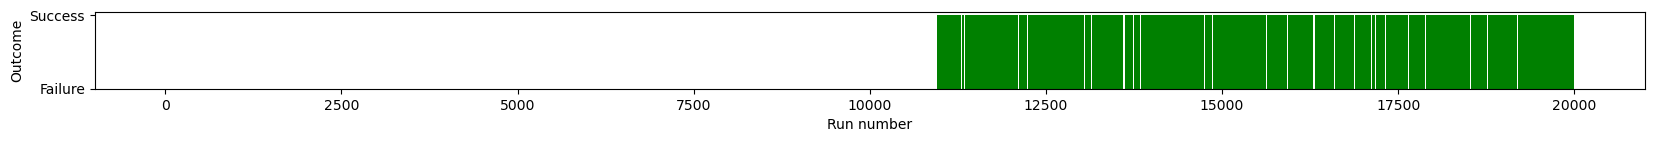

In [7]:
env.reset()

qtable, outcomes = Qtable(env,episodes=20000, print_table=True)

plt.figure(figsize=(20, 1))
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
plt.show()

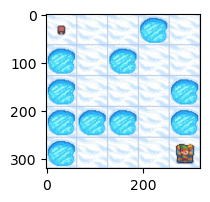

Sequence = [2, 1, 1, 2, 2, 1, 1, 2]


In [8]:
state = env.reset()[0]
done = False
sequence = []
show_animation(env.render())

while not done:
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])
    else:
        action = environment.action_space.sample()
        
    sequence.append(action)
    new_state, reward, done, _, info = env.step(action)
    state = new_state
    show_animation(env.render())

print(f"Sequence = {sequence}")

## Дослідимо різні значення параметру γ 

For Y =  0.1


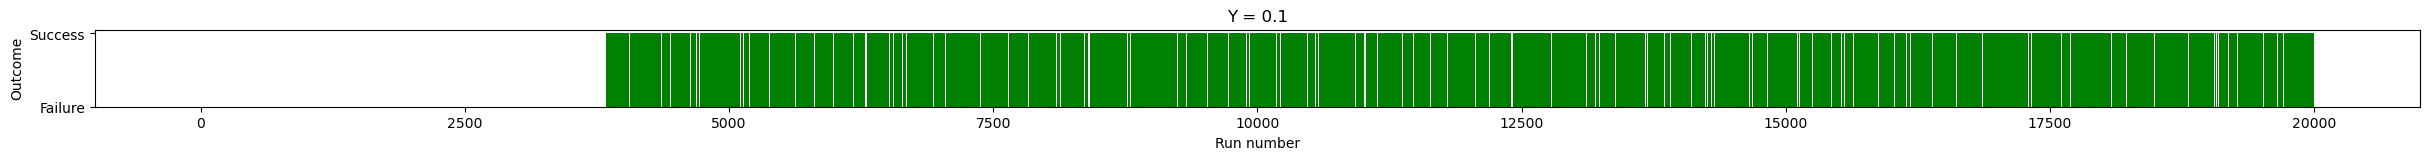

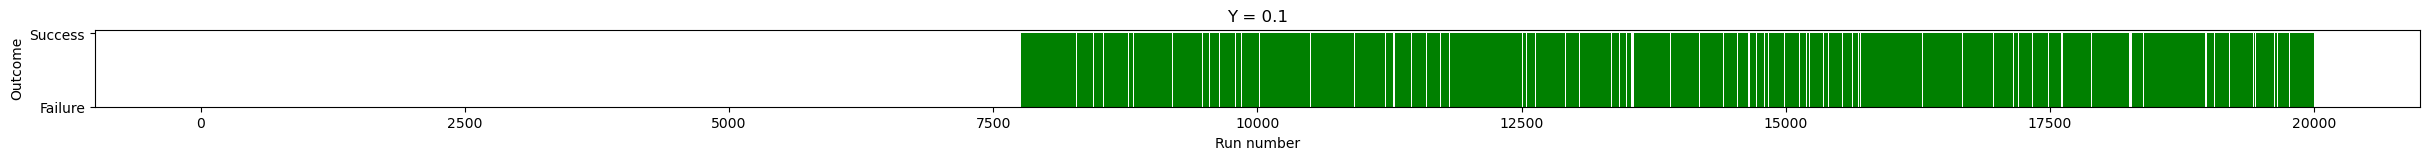

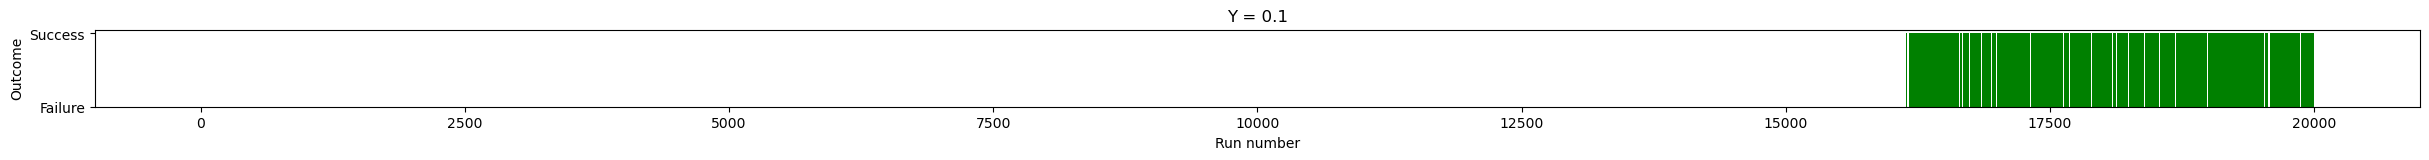

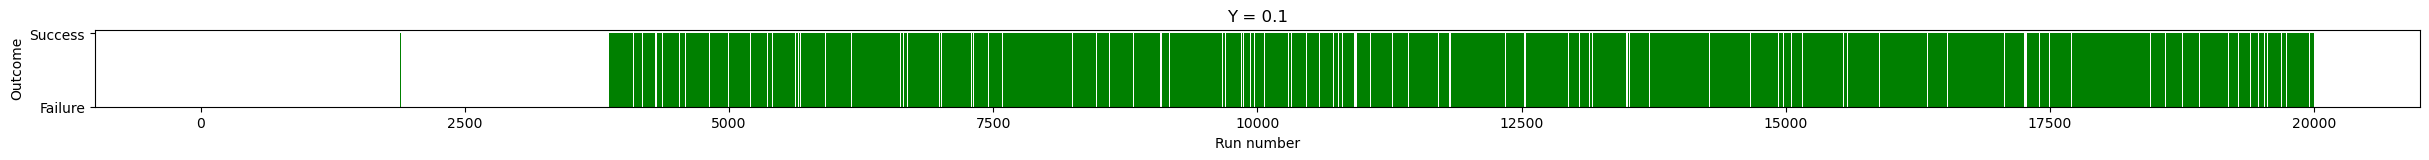

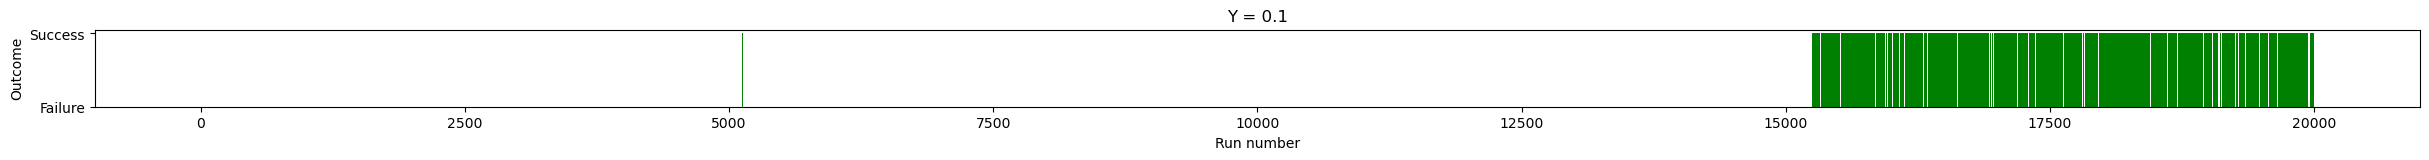

For Y =  0.5


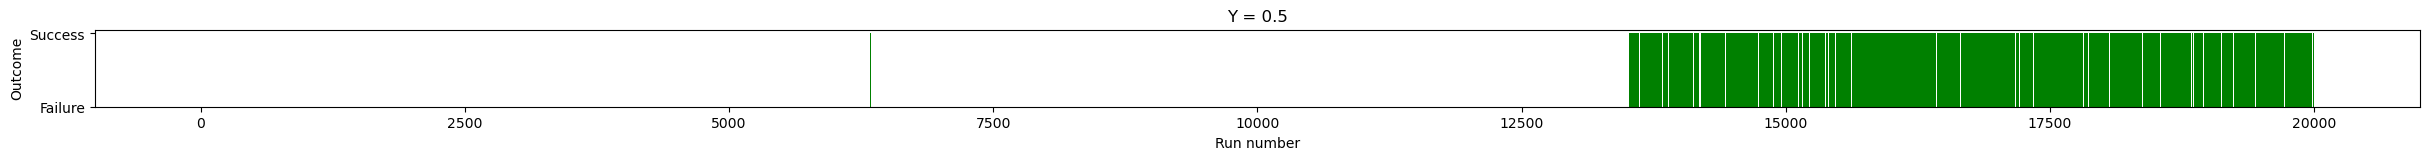

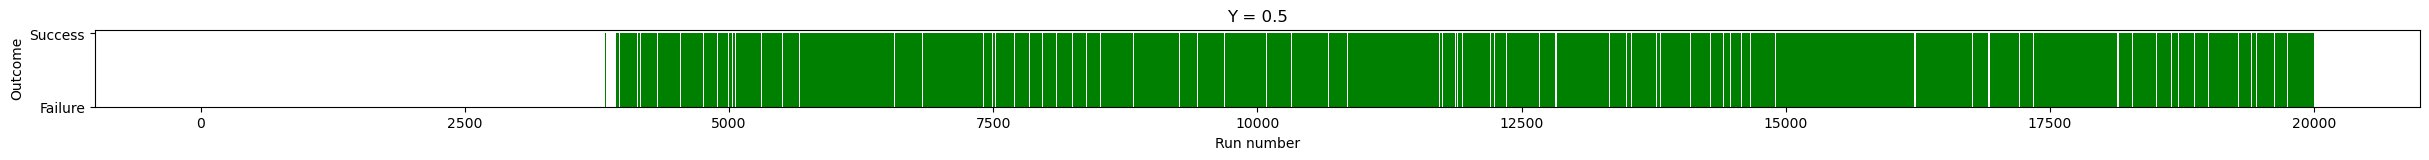

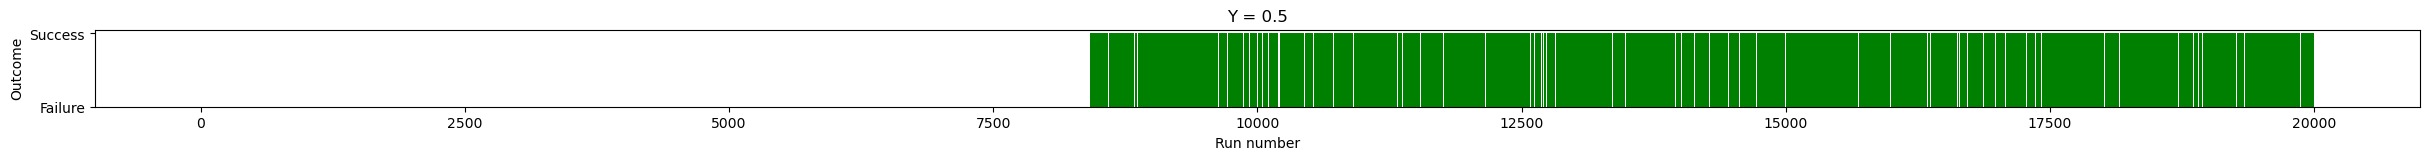

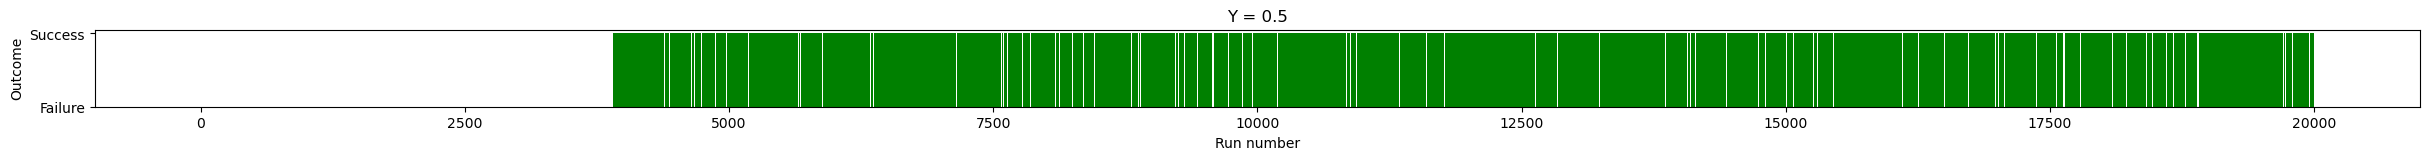

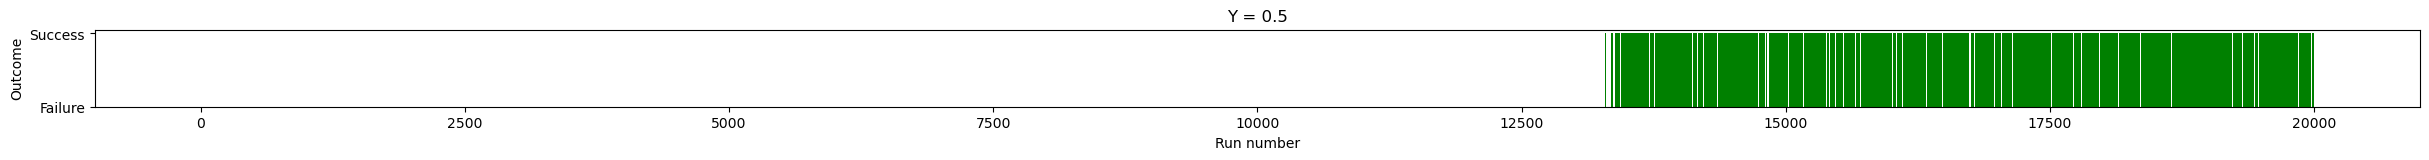

For Y =  0.8


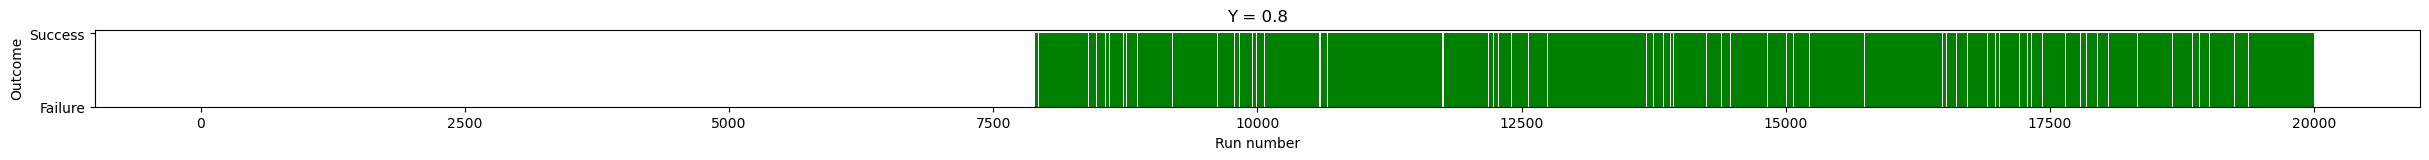

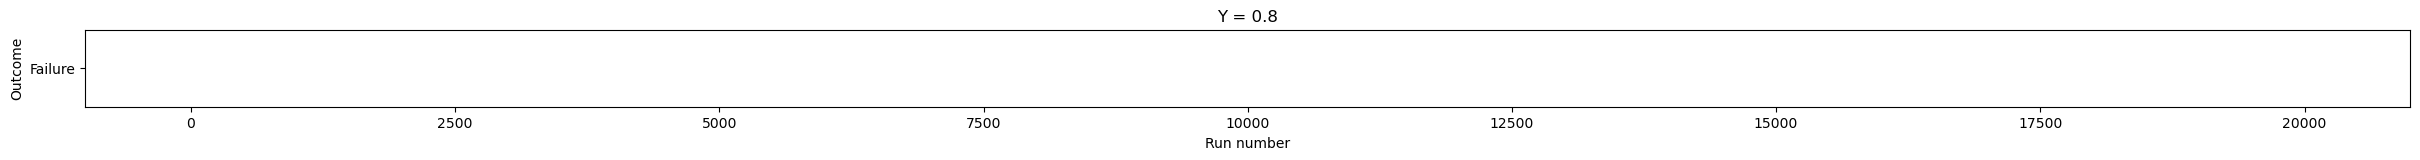

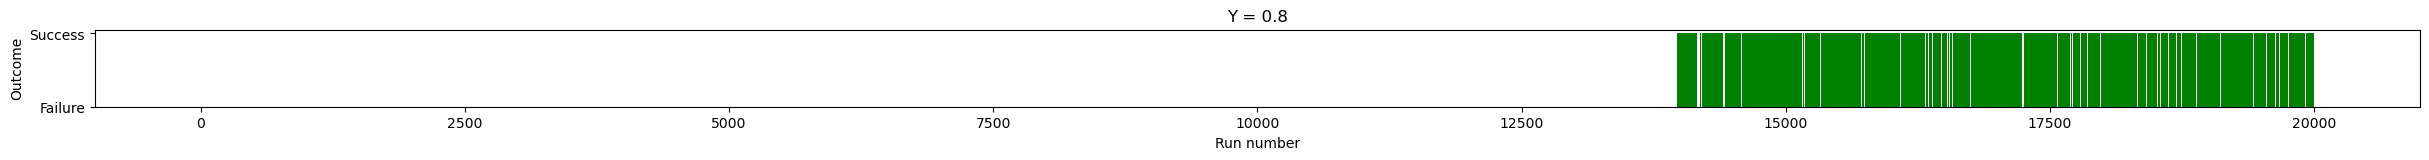

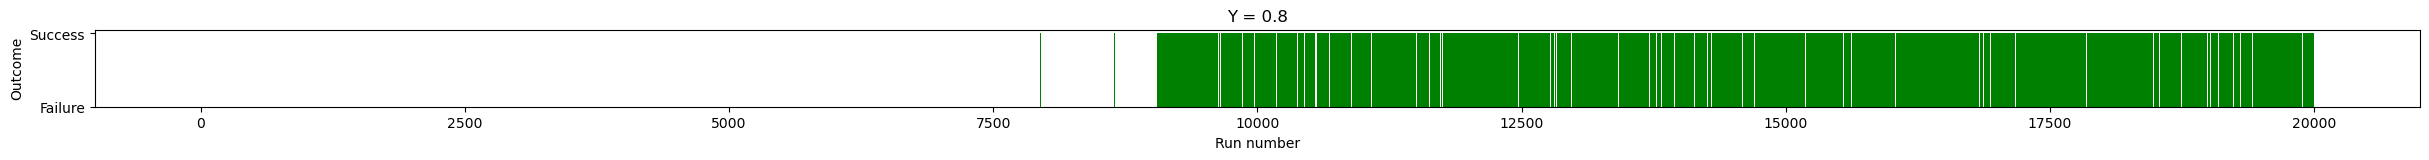

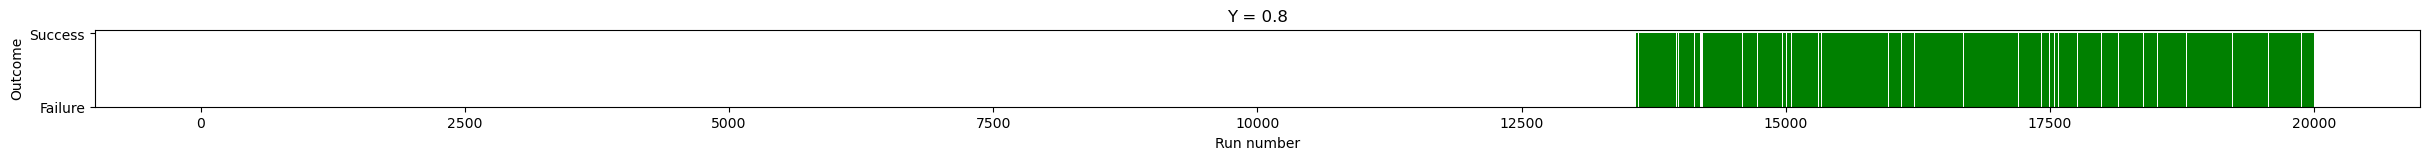

For Y =  1.0


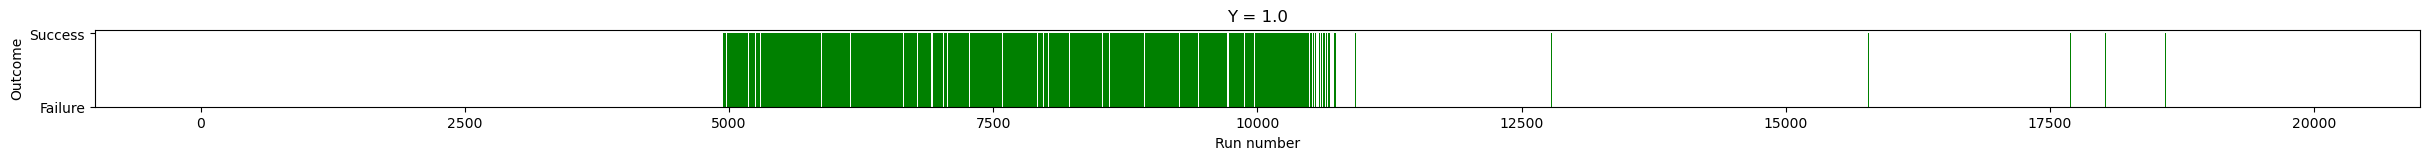

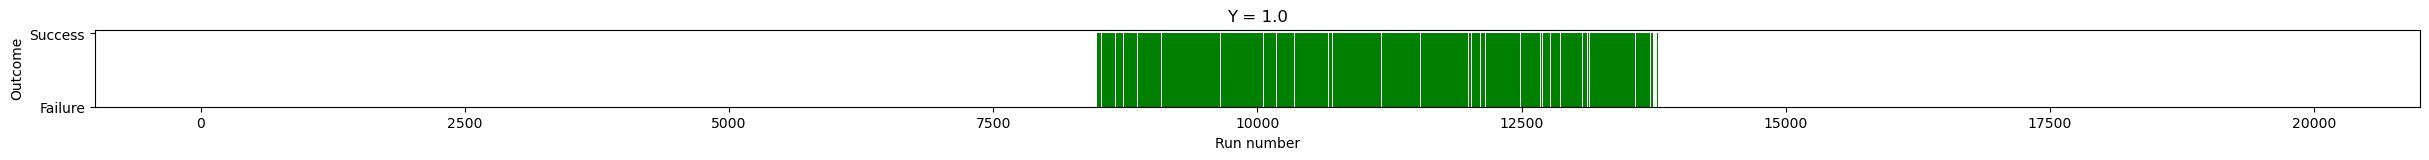

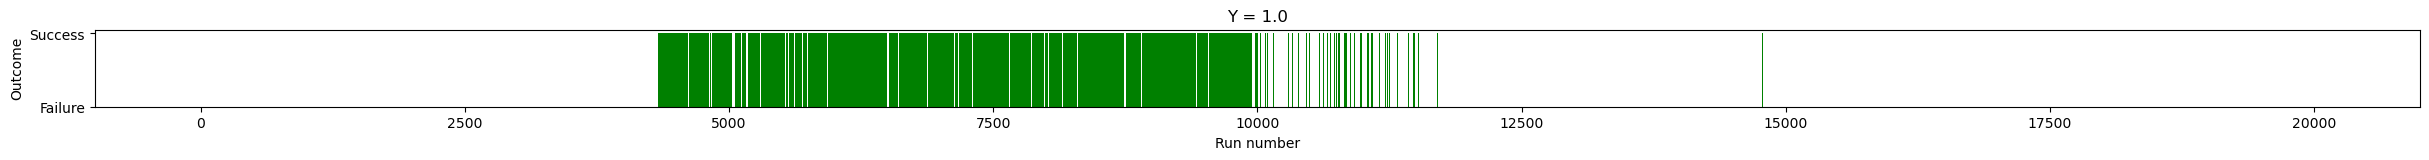

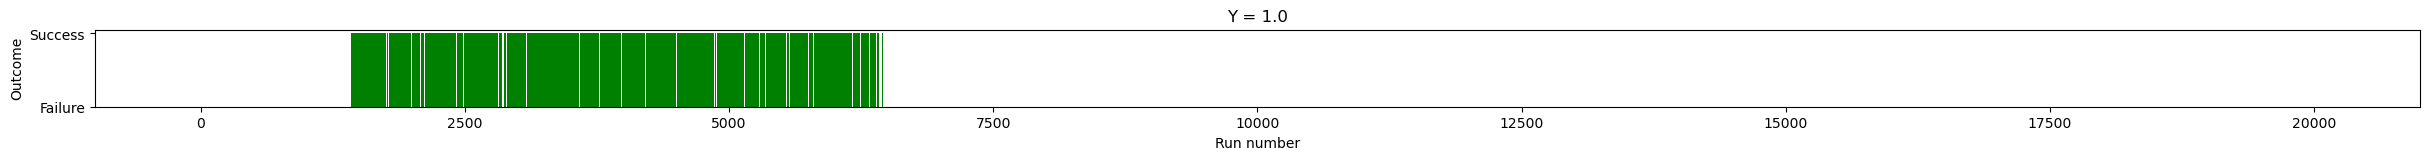

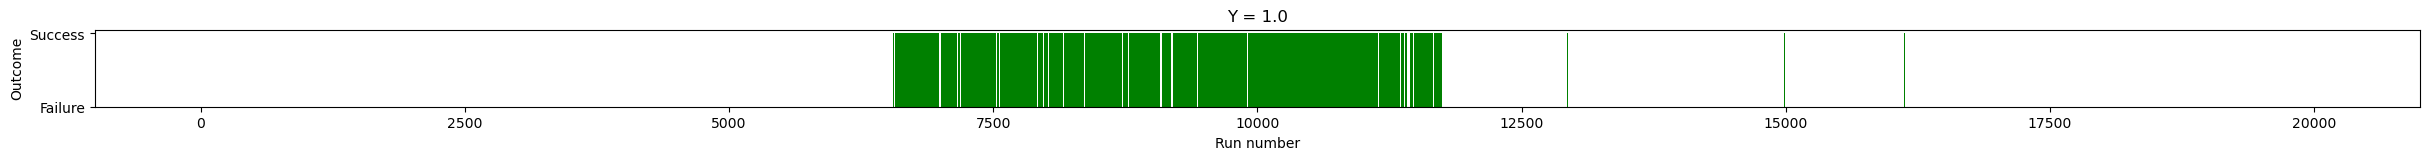

In [8]:
gammas = [0.1, 0.5, 0.8, 1.]
for gamma in gammas:
    print('For Y = ', gamma)
    for _ in range(5):
        env.reset()

        qtabel, outcomes = Qtable(env, episodes=20000, gamma = gamma)

        plt.figure(figsize=(30, 1))
        plt.xlabel("Run number")
        plt.ylabel("Outcome")
        plt.title(f"Y = {gamma}")
        plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
        plt.show()

Q-table after training:
[[1.       0.       1.       1.      ]
 [1.       1.       1.       1.      ]
 [1.       0.       0.       0.698299]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       1.       0.       1.      ]
 [0.       0.       0.       0.      ]
 [0.       1.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       1.       1.      ]
 [1.       0.       1.       0.      ]
 [1.       1.       0.       1.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       1.       0.       1.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       1.       0.      ]
 [1.       1.       1.       1.      ]
 [0.       0.       0.       0.      ]]


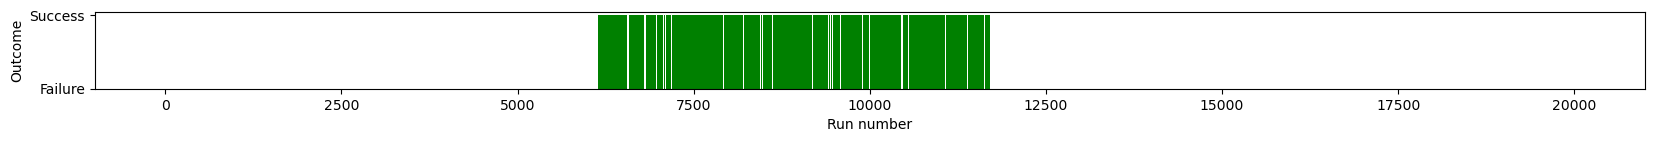

In [8]:
env.reset()

qtable, outcomes = Qtable(env, episodes=20000, gamma = 1, print_table=True)

plt.figure(figsize=(20, 1))
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
plt.show()

Формула оновлення Q-learning: </br>
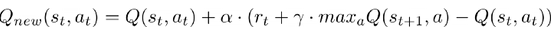

α – це швидкість навчання (між 0 і 1), тобто наскільки сиильно змінюється початкове значення Q(sₜ, aₜ). Якщо α = 0, значення ніколи не змінюється, але якщо α = 1, значення змінюється надзвичайно швидко. Нам потрібно знайти баланс між важливістю минулих і нових знань. </br>
γ — коефіцієнт дисконтування (від 0 до 1), який визначає, наскільки агент дбає про майбутні винагороди порівняно з терміновими. Якщо γ = 0, агент зосереджується лише на негайній винагороді, але якщо γ = 1, будь-яка потенційна майбутня винагорода має таку ж цінність, як і поточна . У Frozen Lake краще низький коефіцієнт γ, оскільки в самому кінці гри є лише одна можлива винагорода. 

### Дослідимо наступну модифікацію середовища замерзлого озера 

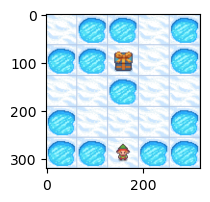

In [9]:
custom_map_2 = ['FHHFH','HHGFH','FFHFF', 'HFFFH', 'HHSHH']
env2 = gym.make("FrozenLake-v1", desc=custom_map_2, render_mode='rgb_array', is_slippery=False)
env2.reset()
show(env2.render())

Q-table after training:
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.95       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [1.         0.9025     0.         0.9025    ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.857375   0.857375   0.95      ]
 [0.9025     0.         0.60012312 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.81450625 0.        ]
 [0.77378094 0.77378094 0.857375   0.        ]
 [0.81450625 0.         0.         0.9025    ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0

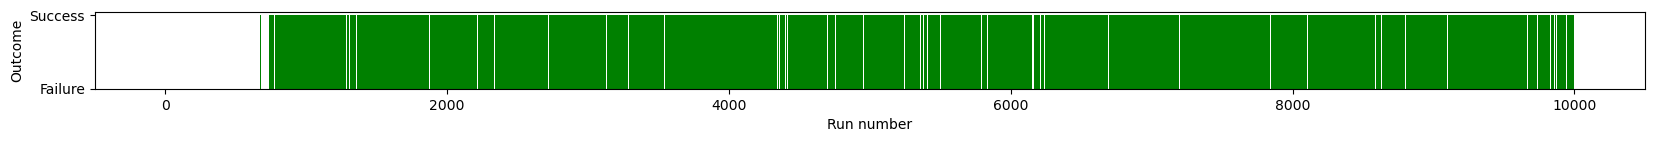

In [10]:
env2.reset()

qtable, outcomes = Qtable(env2, episodes=10000, print_table=True)

plt.figure(figsize=(20, 1))
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
plt.show()

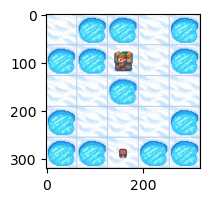

Sequence = [3, 2, 3, 3, 0]


In [11]:
state = env2.reset()[0]
done = False
sequence = []
show_animation(env2.render())

while not done:
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])
    else:
        action = env2.action_space.sample()
        
    sequence.append(action)
    new_state, reward, done, _, info = env2.step(action)
    state = new_state
    show_animation(env2.render())


print(f"Sequence = {sequence}")

For Y =  0.1


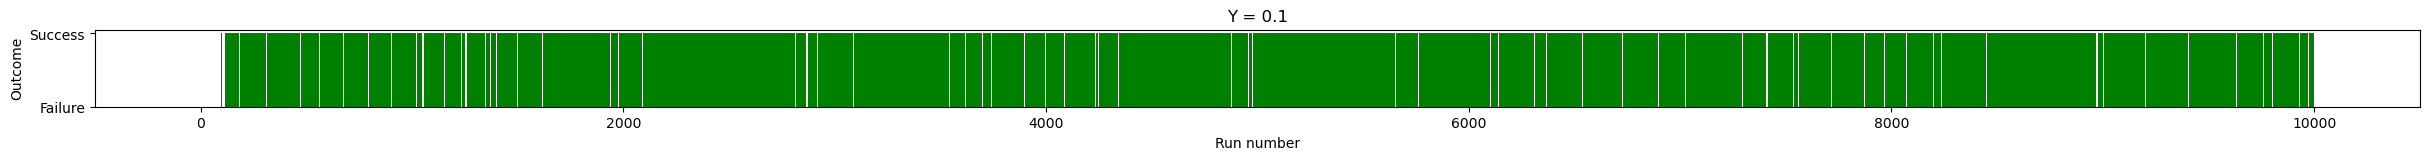

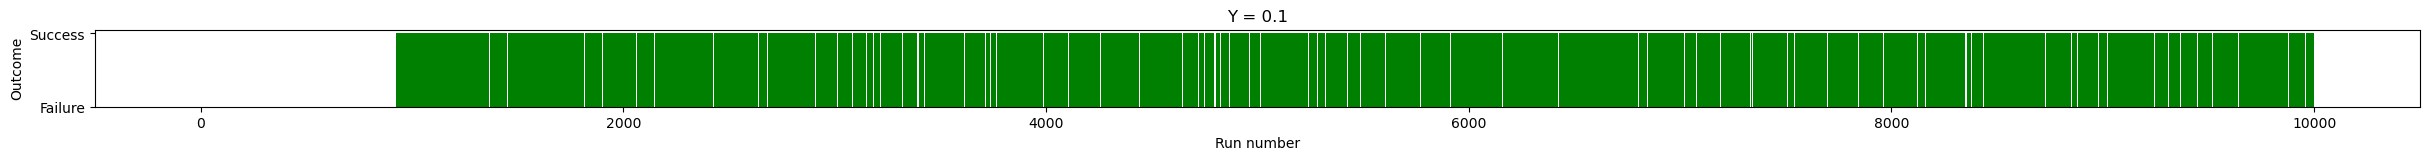

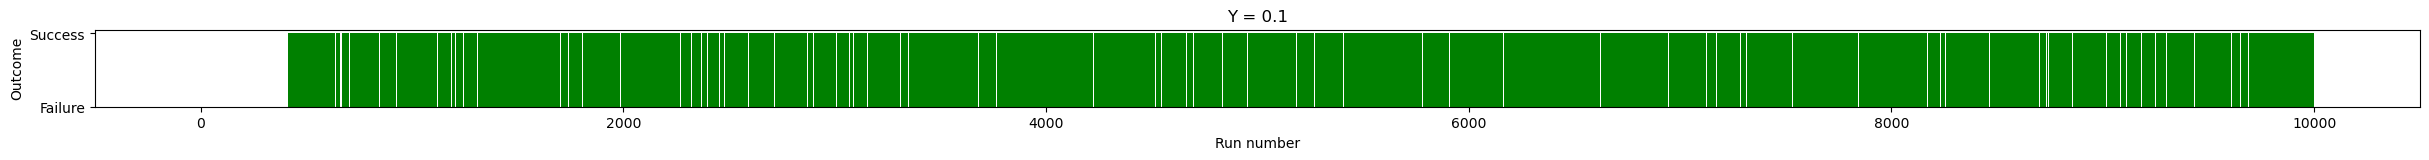

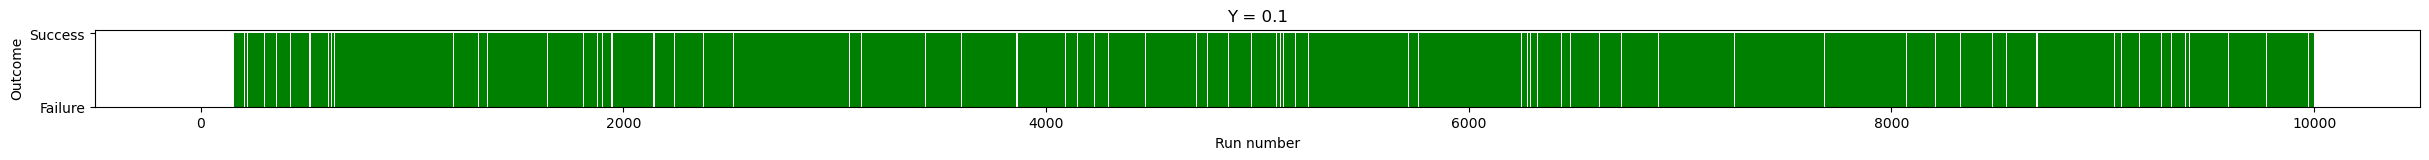

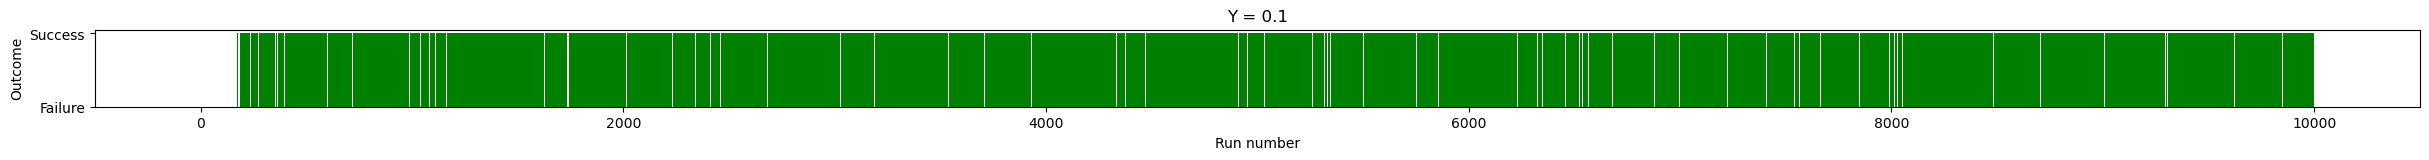

For Y =  0.5


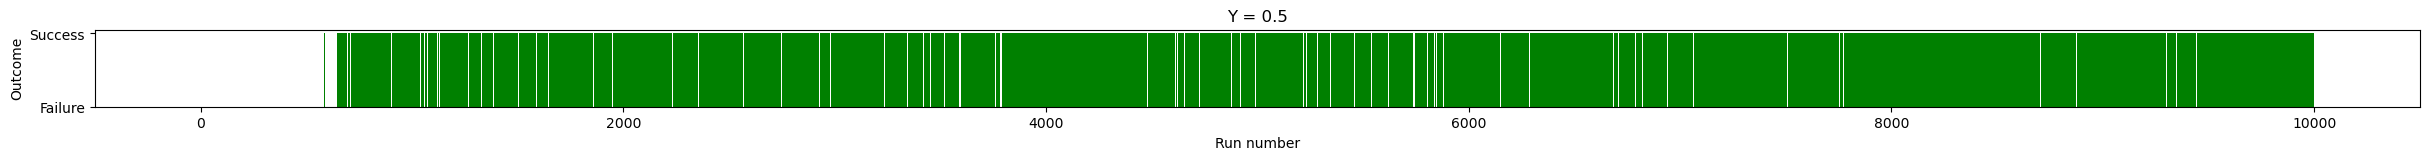

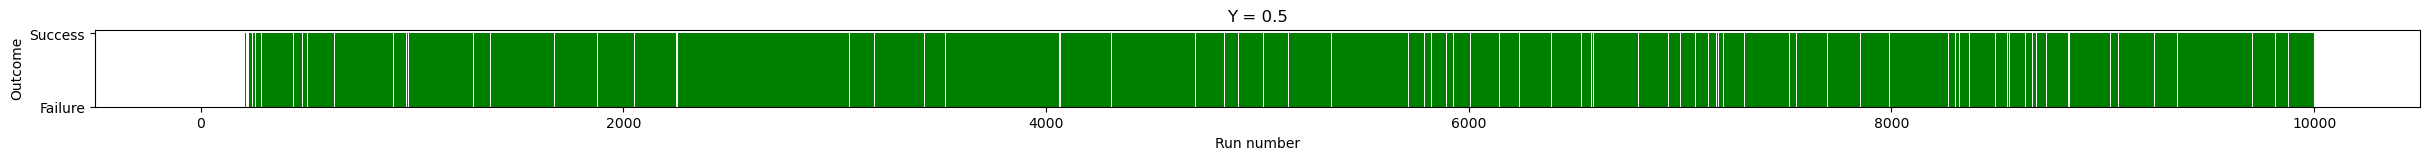

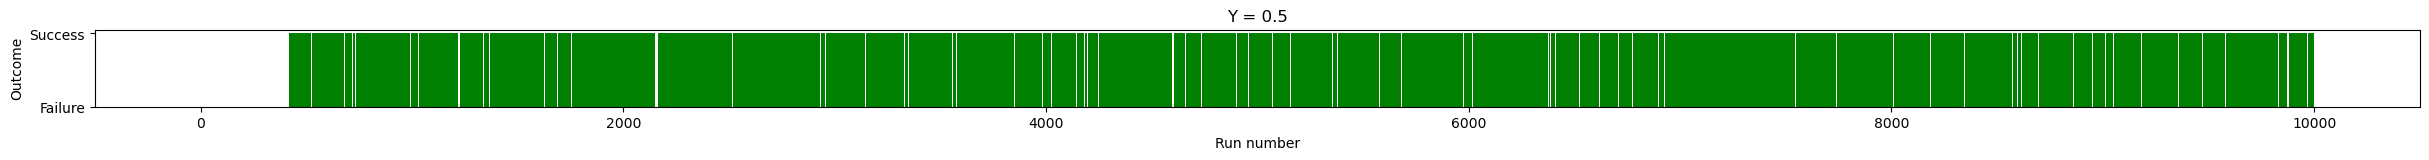

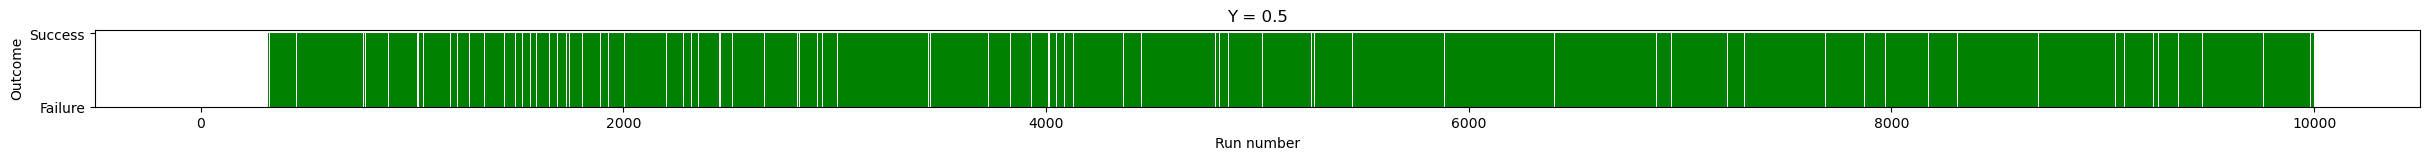

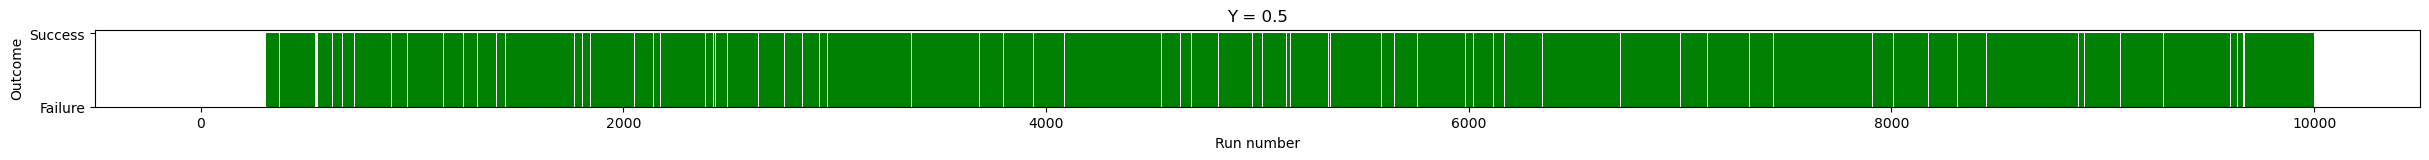

For Y =  0.8


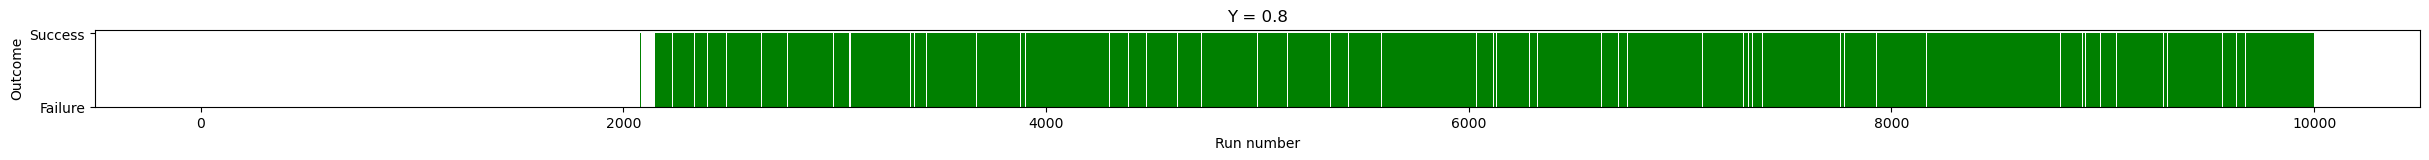

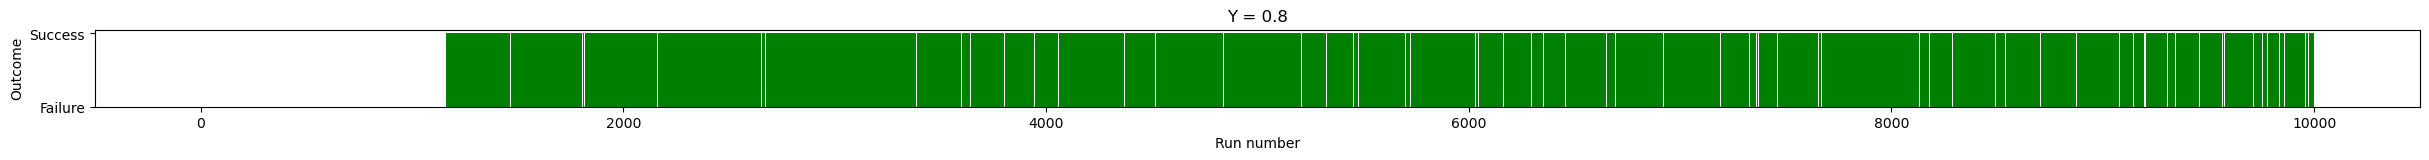

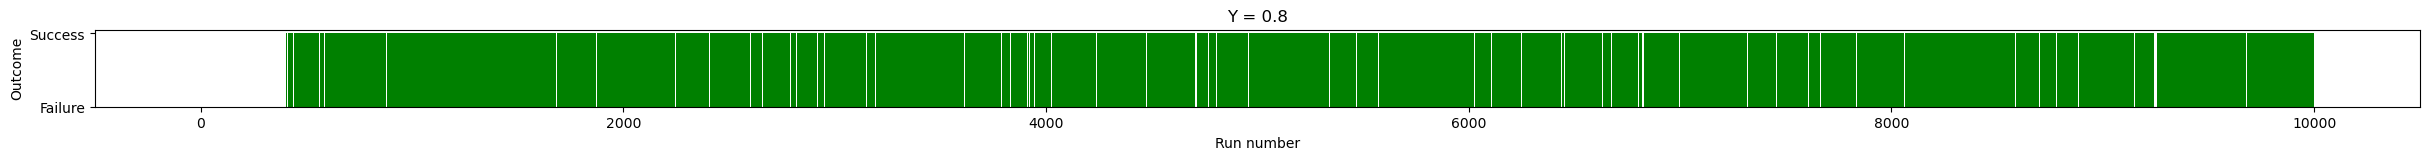

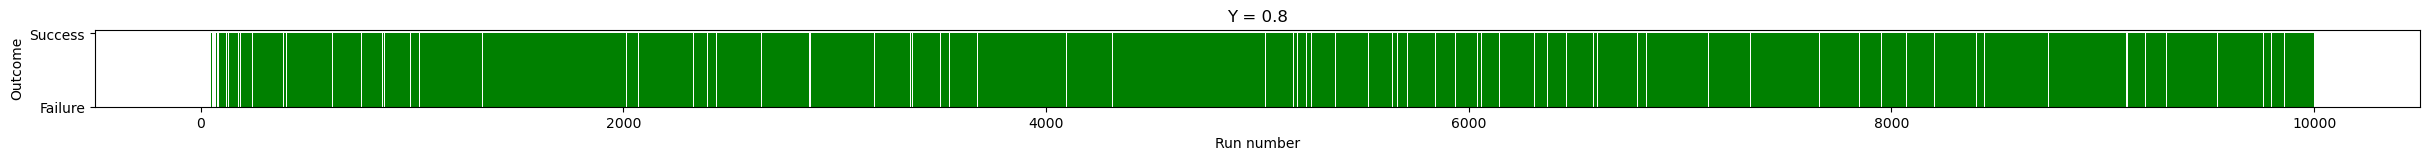

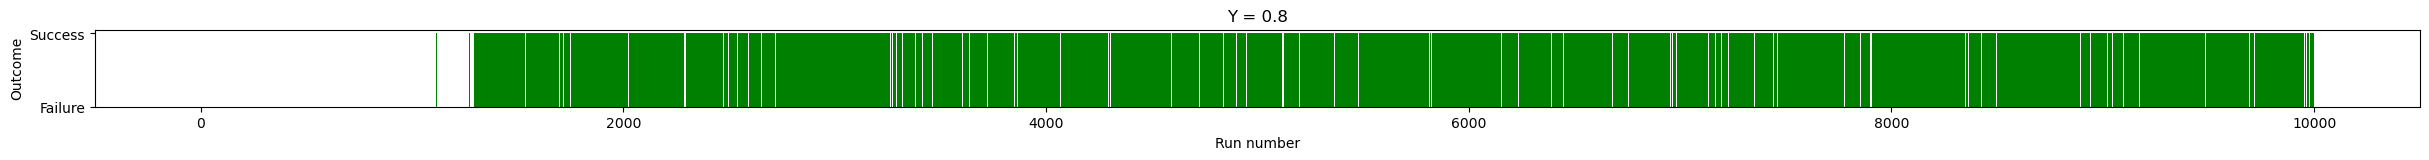

For Y =  1.0


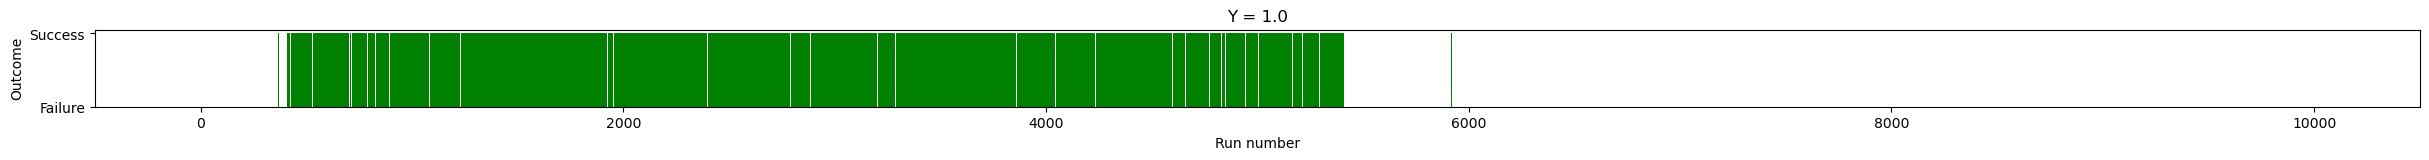

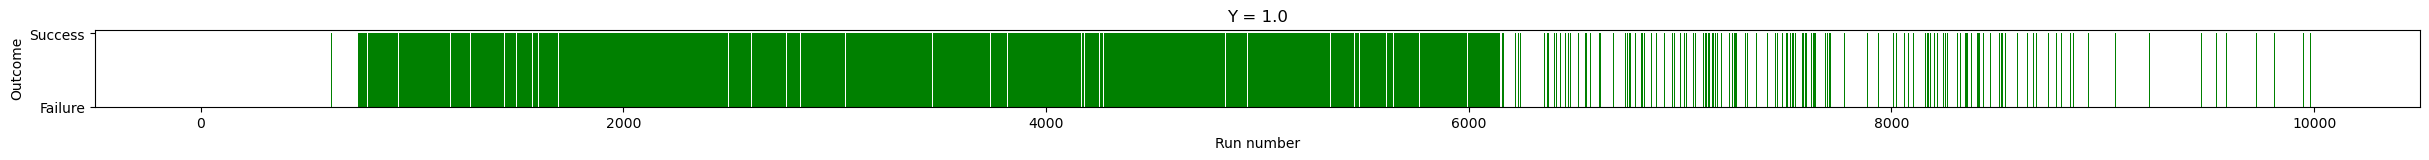

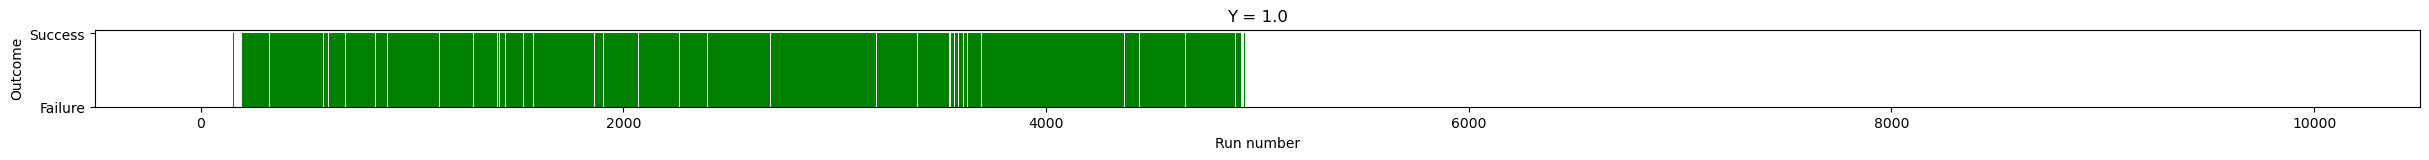

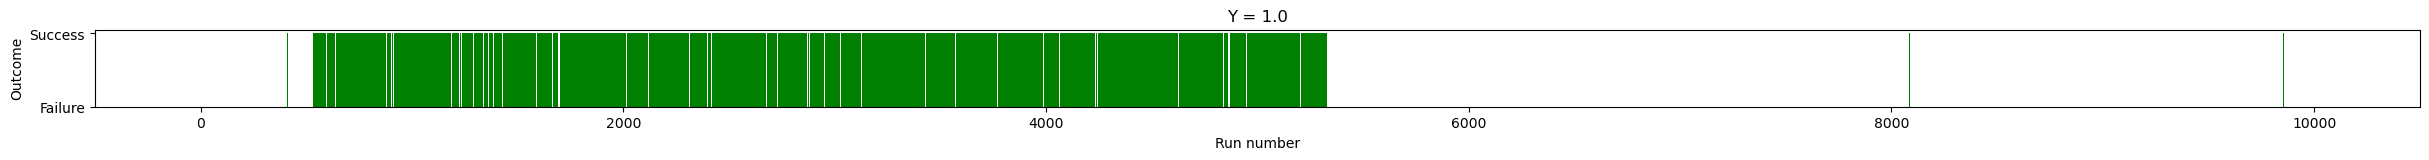

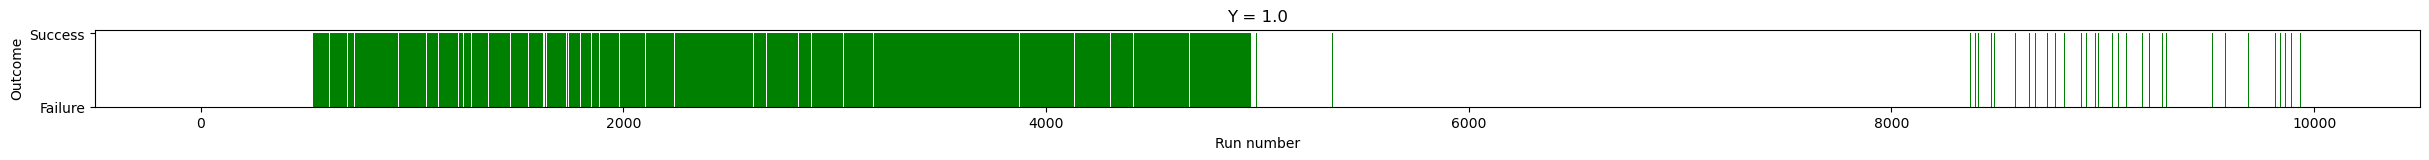

In [77]:
gammas = [0.1, 0.5, 0.8, 1.]
for gamma in gammas:
    print('For Y = ', gamma)
    for _ in range(5):
        env.reset()

        qtabel, outcomes = Qtable(env2, episodes=10000, gamma=gamma)

        plt.figure(figsize=(30, 1))
        plt.xlabel("Run number")
        plt.ylabel("Outcome")
        plt.title(f"Y = {gamma}")
        plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
        plt.show()

## Агент, що обирає дії згідно SARSA алгоритму 

In [13]:
def SARSA(env, episodes=1000, lr=0.7, gamma=0.95, epsilon=0.02, max_steps=120, print_table=False):
    qtable = np.zeros( (env.observation_space.n, env.action_space.n) )
    outcomes = []
    for episod in range(0, episodes):
        outcomes.append("Failure")
        
        S_t = env.reset()[0]
        random_int = np.random.uniform(0, 1)
        if random_int > epsilon and np.max(qtable[S_t]) > 0:
            A_t = np.argmax(qtable[S_t])
        else:
            A_t = env.action_space.sample()
            
            
        for t in range(0, max_steps):
            S_t1, R_t1, done,_, info = env.step(A_t)
                
            random_int = np.random.uniform(0, 1)
            if random_int > epsilon and np.max(qtable[S_t1]) > 0:
                A_t1 = np.argmax(qtable[S_t1])
            else:
                A_t1 = env.action_space.sample()
            qtable[S_t, A_t] = qtable[S_t, A_t] + lr * (R_t1 + gamma * qtable[S_t1, A_t1] - qtable[S_t, A_t])
            S_t, A_t = S_t1, A_t1
            
            if R_t1:
                outcomes[-1] = "Success"
            if done:
                break
    if print_table:
        print('Q-table after training:')
        print(qtable)
    return qtable, outcomes

Формула оновлення SARSA </br>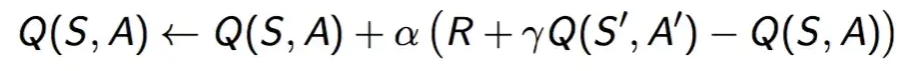

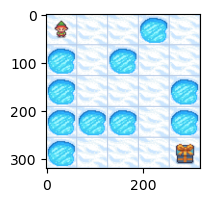

In [5]:
actions = {
    0: 'Left',
    1: 'Down',
    2: 'Right', 
    3: 'Up'
}
MAX_ITERATIONS = 20

custom_map = ['SFFHF', 'HFHFF','HFFFH','HHHFH','HFFFG']
env = gym.make("FrozenLake-v1", desc=custom_map, render_mode='rgb_array', is_slippery=False)
env.reset()
show(env.render())

Q-table after training:
[[0.16895222 0.         0.68653241 0.12788994]
 [0.17208982 0.7191483  0.16997905 0.54197264]
 [0.17049894 0.         0.         0.04788029]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.76179327 0.         0.1829378 ]
 [0.         0.         0.         0.        ]
 [0.         0.81665901 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.64380541 0.07816836]
 [0.24282008 0.         0.76727014 0.        ]
 [0.37016506 0.89275691 0.         0.69256039]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.94855379 0.         0.47582725]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0

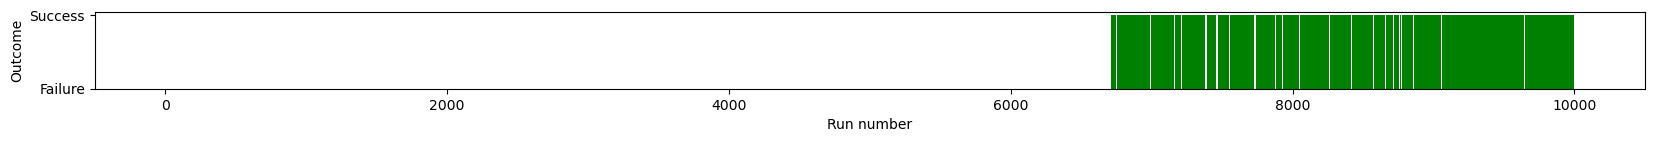

In [14]:
env = gym.make("FrozenLake-v1", desc=custom_map, render_mode='rgb_array', is_slippery=False)
env.reset()

qtable, outcomes = SARSA(env, episodes=10000, epsilon=0.02, print_table=True)
plt.figure(figsize=(20, 1))
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
plt.show()

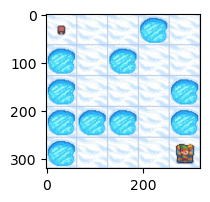

Sequence = [2, 1, 1, 2, 2, 1, 1, 2]


In [15]:
state = env.reset()[0]
done = False
sequence = []
show_animation(env.render())

while not done:
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])
    else:
        action = environment.action_space.sample()
        
    sequence.append(action)
    new_state, reward, done, _, info = env.step(action)
    state = new_state
    show_animation(env.render())

print(f"Sequence = {sequence}")

For Y =  0.1


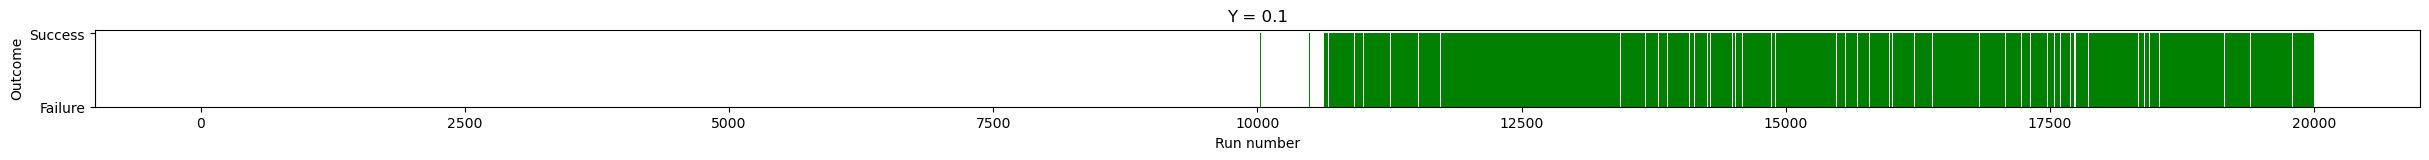

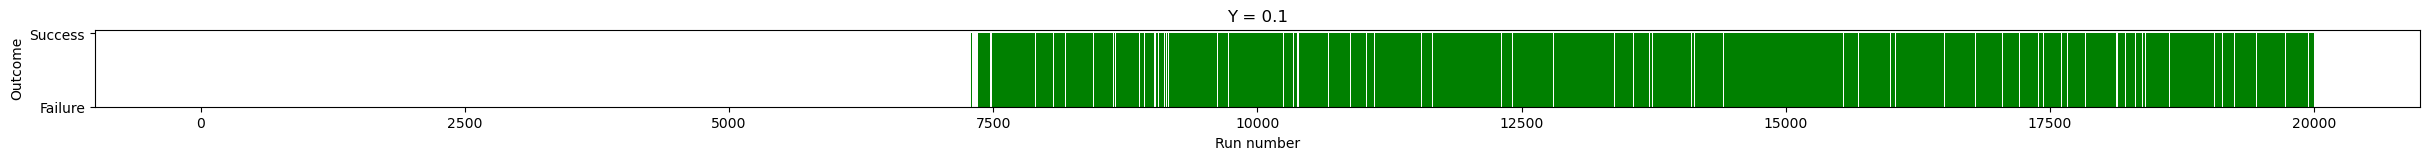

For Y =  0.5


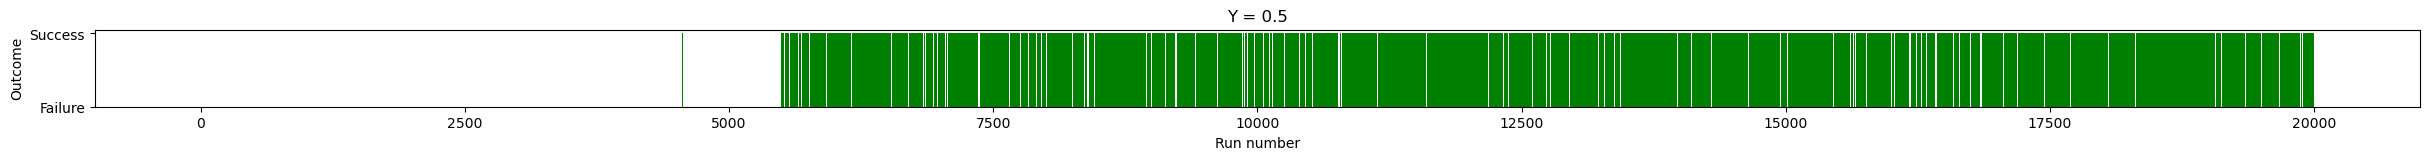

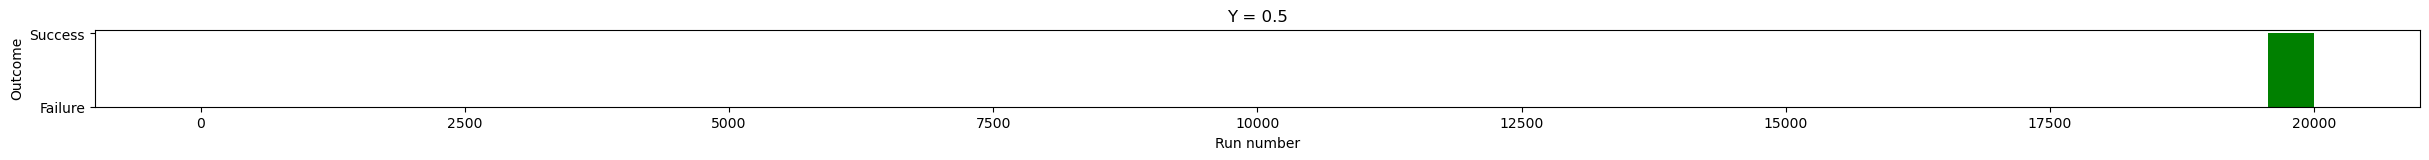

For Y =  0.8


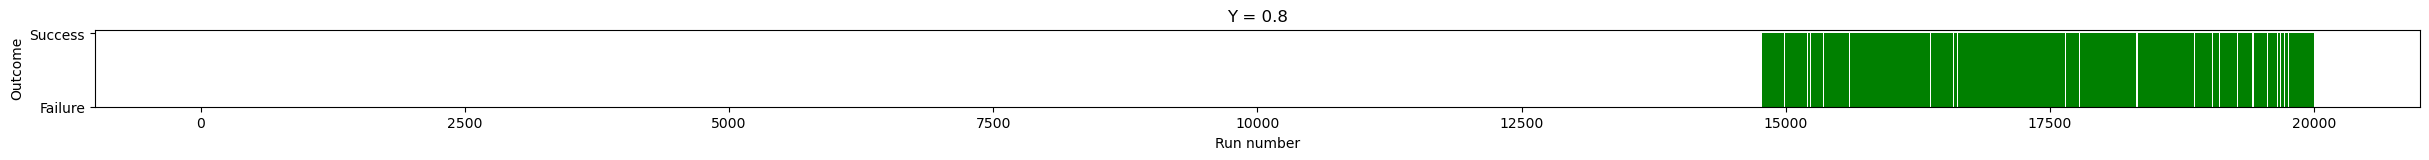

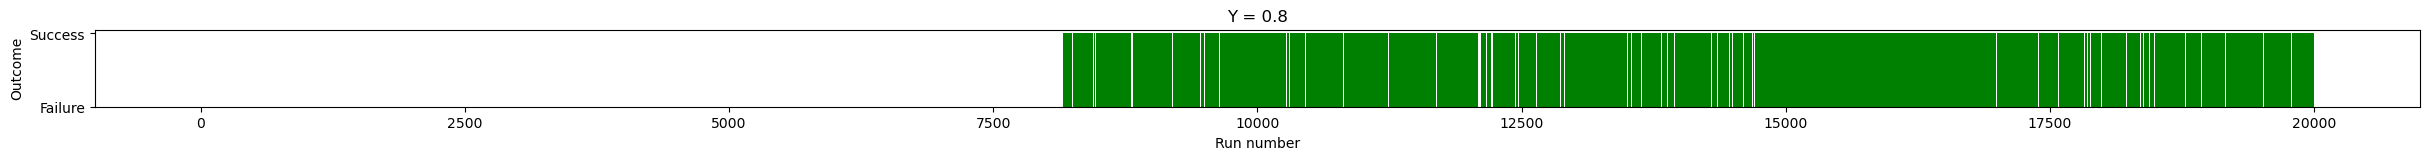

For Y =  1.0


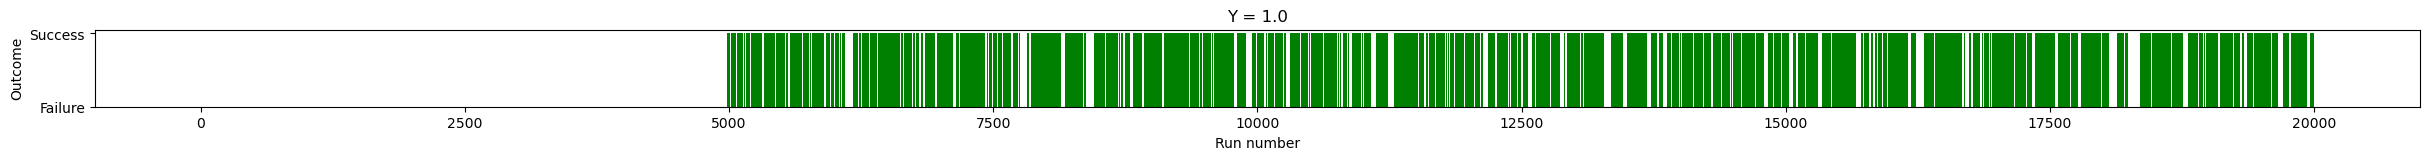

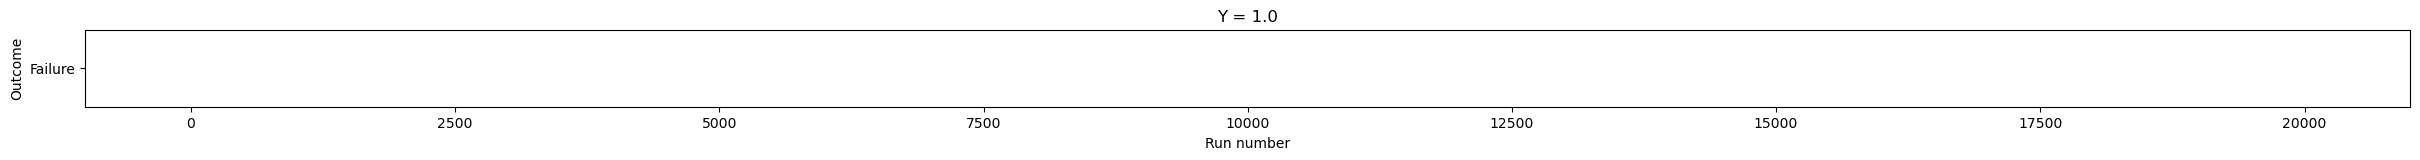

In [80]:
gammas = [0.1, 0.5, 0.8, 1.]
for gamma in gammas:
    print('For Y = ', gamma)
    for _ in range(2):
        env.reset()

        qtabel, outcomes = SARSA(env, episodes=20000, gamma=gamma)

        plt.figure(figsize=(30, 1))
        plt.xlabel("Run number")
        plt.ylabel("Outcome")
        plt.title(f"Y = {gamma}")
        plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
        plt.show()

### Дослідимо для другої модифікації середовища замерзлого озера

Q-table after training:
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.95       0.         0.63175   ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [1.         0.73769294 0.         0.9025    ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.42511189 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.47395846 0.26138126 0.95      ]
 [0.25715981 0.         0.14972414 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.2526526  0.23044487]
 [0.25433119 0.24956516 0.857375   0.        ]
 [0.36024329 0.         0.         0.9025    ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0

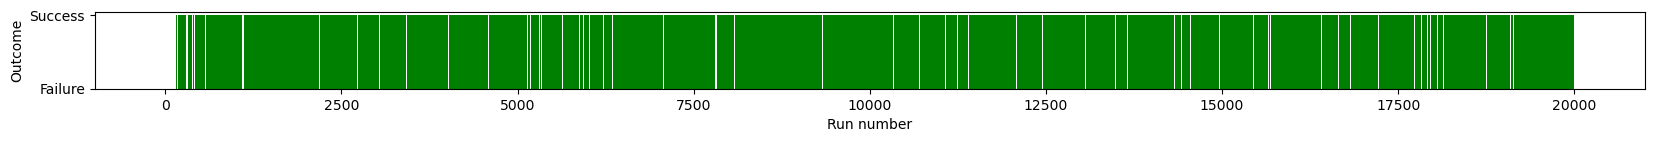

In [81]:
env2.reset()

qtable, outcomes = SARSA(env2, episodes=20000, epsilon=0.02, print_table=True)
plt.figure(figsize=(20, 1))
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
plt.show()

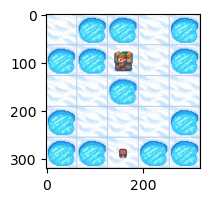

Sequence = [3, 2, 3, 3, 0]


In [82]:
state = env2.reset()[0]
done = False
sequence = []
show_animation(env2.render())

while not done:
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])
    else:
        action = env2.action_space.sample()
        
    sequence.append(action)
    new_state, reward, done,_, info = env2.step(action)
    state = new_state
    show_animation(env2.render())

print(f"Sequence = {sequence}")

For Y =  0.1


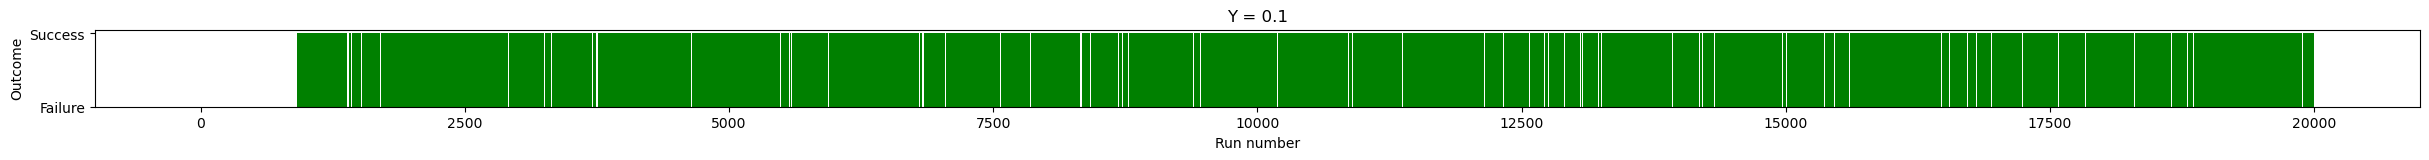

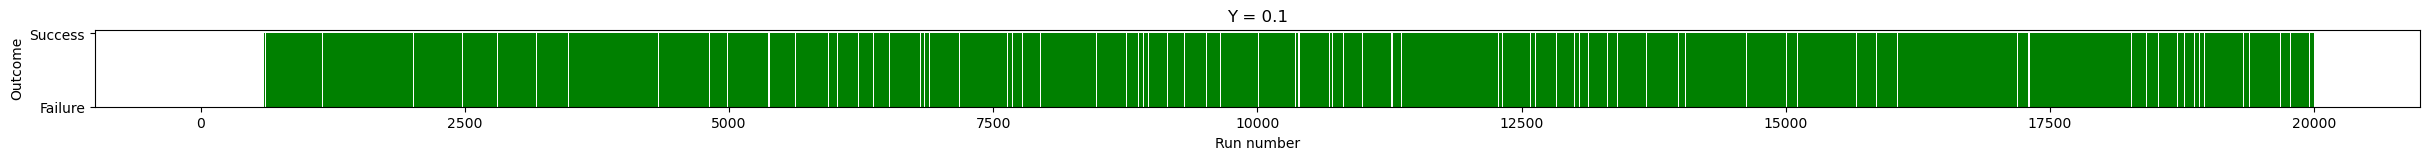

For Y =  0.5


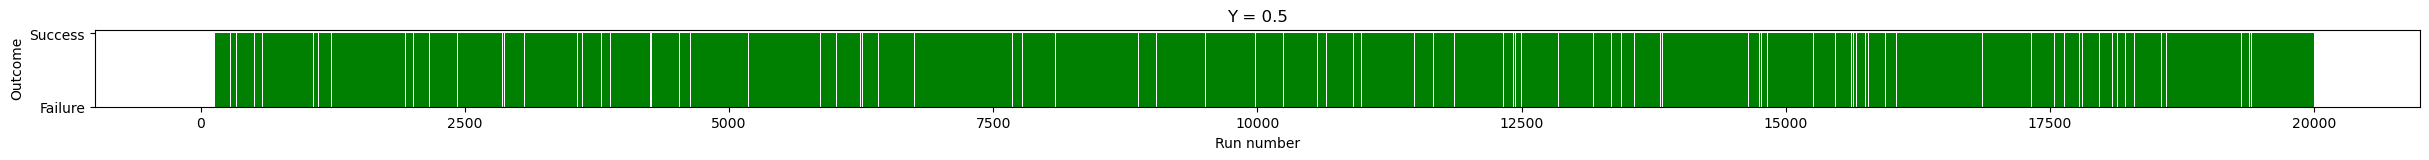

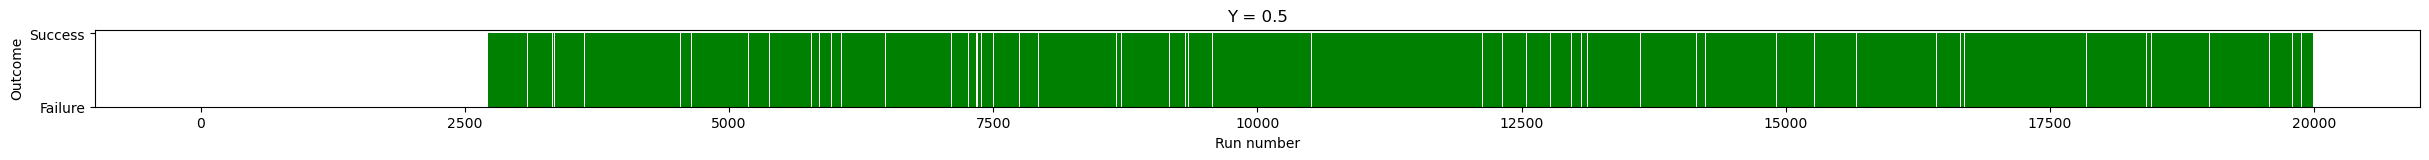

For Y =  0.8


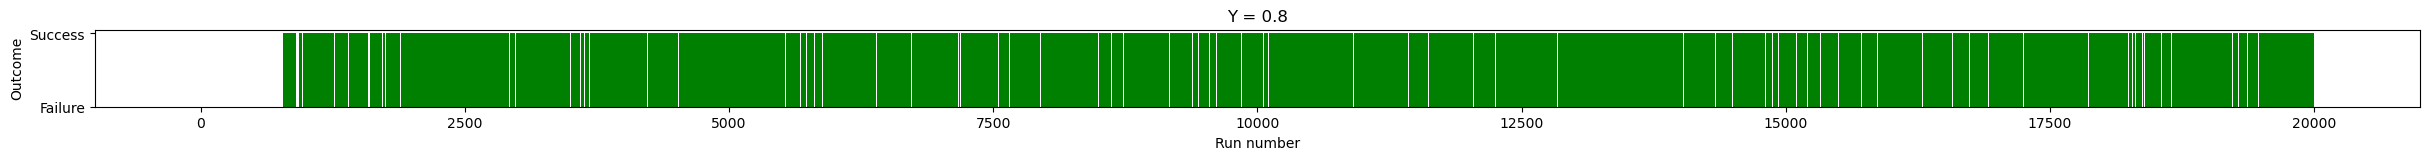

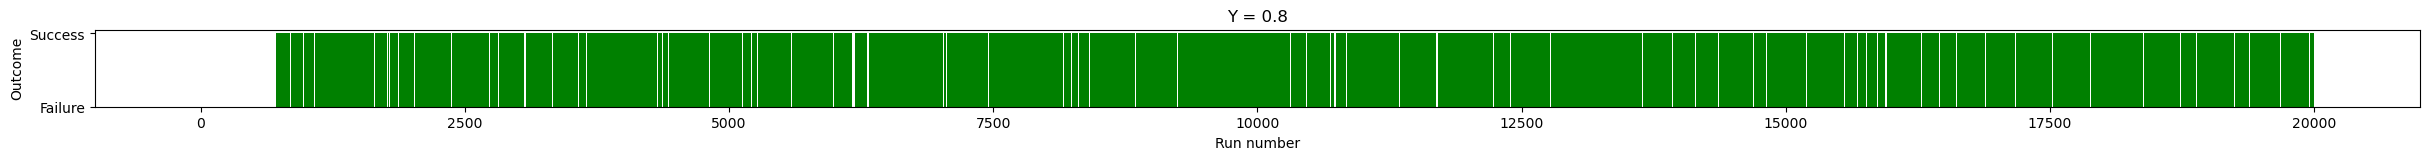

For Y =  1.0


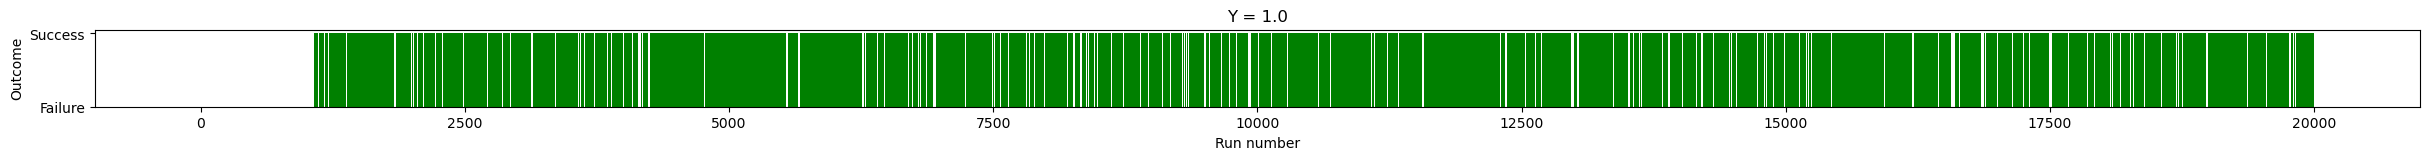

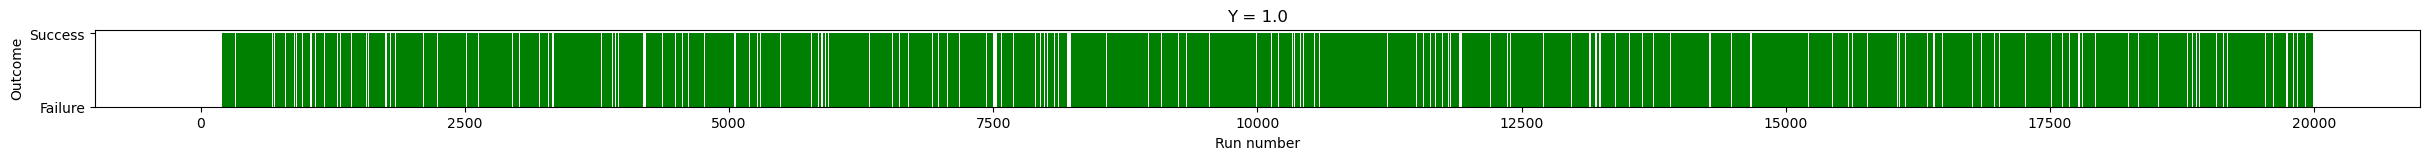

In [83]:
gammas = [0.1, 0.5, 0.8, 1.]
for gamma in gammas:
    print('For Y = ', gamma)
    for _ in range(2):
        env2.reset()

        qtabel, outcomes = SARSA(env2, episodes=20000, gamma=gamma)

        plt.figure(figsize=(30, 1))
        plt.xlabel("Run number")
        plt.ylabel("Outcome")
        plt.title(f"Y = {gamma}")
        plt.bar(range(len(outcomes)), outcomes, color="g", width=1)
        plt.show()